Pandas is a module for fast and efficient data analysis tools in Python.
<p>
    - Pandas Series is a single column of data.
    <br>
    - Pandas DataFrame is a several columns of data.

In [2]:
import pandas as pd
import s3fs 

In [4]:
# Series
s = pd.Series(np.random.randn(4), name='daily returns')
s*100
np.abs(s)
s.describe()
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s['AMZN']
'AAPL' in s

count    4.000000
mean     0.089619
std      0.631073
min     -0.396087
25%     -0.251560
50%     -0.129088
75%      0.212091
max      1.012736
Name: daily returns, dtype: float64

In [34]:
# DataFrames
df = pd.read_csv('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/pandas/data/test_pwt.csv')
type(df)
df #display dataframe
df.head() #display 1st 5 rows
df.tail() #display last 5 rows
df.iloc[2:5, 0:4] #select rows and columns using their integer indexes
df.loc[df.index[2:5], ['country', 'tcgdp']] # select rows and columns using mixture of indexes and labels


df[['country', 'tcgdp']] #select certain columns from the dataframe
df2 = df[['country', 'POP', 'tcgdp']] # create new dataframe from the selected columns

df2 = df2.rename(index = str, columns={'POP': 'population','tcgdp': 'total GDP'}) # rename columns

df2['population'] = df2['population'] * 1e3 # column multiplication
df2['GDP percap'] = df2['total GDP'] * 1e6 / df2['population']
df2 = df2.set_index('country') #set a column for an index



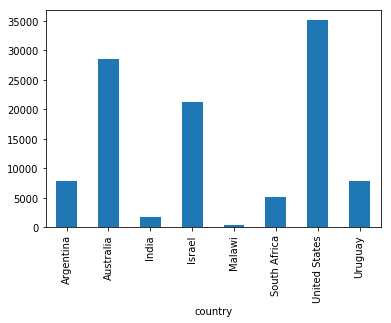

In [35]:
# plot GDP percap
import matplotlib.pyplot as plt
%matplotlib inline

df2['GDP percap'].plot(kind='bar')
plt.show()

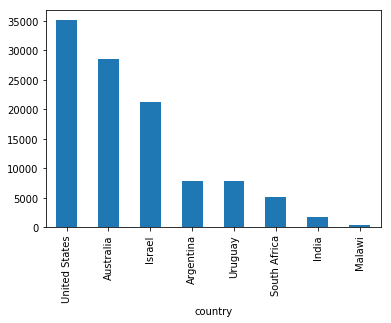

In [36]:
df2 = df2.sort_values(by='GDP percap', ascending=False)
df2['GDP percap'].plot(kind='bar')
plt.show()

In [ ]:
# Use pandas to read, write files
import pandas as pd
pd.read_csv("csv_path_here")
pd.read_excel("excel-path-here")

# Write pandas dataframe to file
df = pd.DataFrame()
df.to_csv("csv-path-here", index=False)

In [ ]:
# Read file on S3 storage and load it as Pandas dataframe
import s3fs
fs = s3fs.S3FileSystem(anon=True)
fs.ls('datacases/datathon-2018-2/')
fs.ls('datacases/datathon-2018-2/kaufland')
with fs.open('datacases/datathon-2018-2/kaufland/20180820_Kaufland_case_IoT_and_predictive_maintenance_events.xlsx', 'rb') as f:
    df_events = pd.read_excel(f)

References: <p>
    https://pandas.pydata.org/
    <br>
    http://www.numpy.org/
    <br>
https://quantecon.org
    <br>
https://matplotlib.org/gallery.html
    <br>
http://scipy-lectures.org/intro/matplotlib/matplotlib.html
    <br>
    https://www.scipy.org/
    